# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [16]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal
from scipy.signal import butter, freqz, cheby1, cheby2


Pretty printing has been turned OFF


## Filtering 
**1.1**

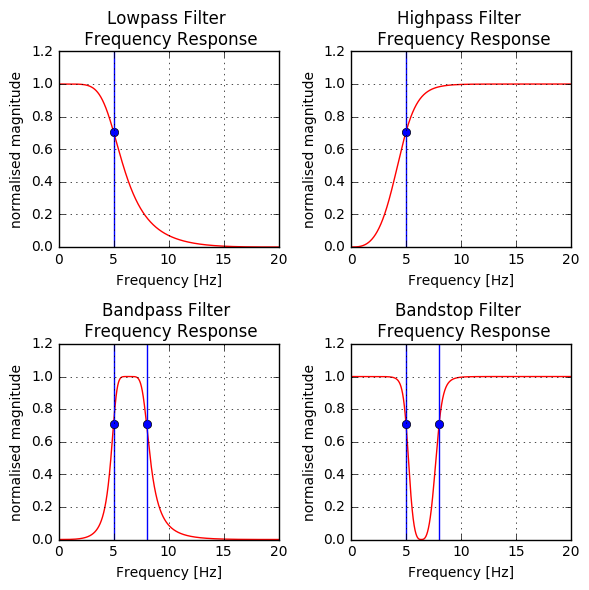

In [10]:
# requirements.
order = 3
cutoff = 5.0  # desired cutoff frequency 

#bandpass and reject
low_c = 5.0
high_c = 8.0
fs = 40 #sampling freq
max_freq = 0.5 * fs #nyquist

cutoff_n = cutoff / max_freq #normalised cutoff

q, p = butter(order, cutoff_n, btype='low', analog=False)
s ,r = butter(order,cutoff_n, btype ='high', analog = False)

low_c_n = low_c / max_freq
high_c_n = high_c / max_freq

v,u = butter(order,[low_c_n, high_c_n], btype ='bandpass', analog = False)
z,y = butter(order,[low_c_n, high_c_n], btype ='bandstop', analog = False)


plt.figure(figsize = (6,6))

# for low pass
w, h = freqz(q, p, worN=10000)

plt.subplot(2, 2, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'r') #plot the response
plt.plot(cutoff, 1/np.sqrt(2), 'bo') # show the cutoff point
plt.axvline(cutoff, color='b') #draw line
plt.xlim(0, fs/2)
plt.title("Lowpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('normalised magnitude')
plt.grid()

w, h = freqz(s, r, worN=10000)
plt.subplot(2, 2, 2)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'r') #plot the response
plt.plot(cutoff, 1/np.sqrt(2), 'bo') # show the cutoff point
plt.axvline(cutoff, color='b') #draw line
plt.xlim(0, fs/2)
plt.title("Highpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('normalised magnitude')
plt.grid()


w, h = freqz(v, u, worN=10000)
plt.subplot(2, 2, 3)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'r') #plot resp
plt.plot(low_c, 1/np.sqrt(2), 'bo') # show low cut point
plt.plot(high_c, 1/np.sqrt(2), 'bo') #show high cut point
plt.axvline(low_c, color='b') 
plt.axvline(high_c, color='b')
plt.xlim(0, fs/2)
plt.title("Bandpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('normalised magnitude')
plt.grid()
plt.tight_layout()

w, h = freqz(z, y, worN=10000)
plt.subplot(2, 2, 4)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'r') #plot resp
plt.plot(low_c, 1/np.sqrt(2), 'bo') # show low cut point
plt.plot(high_c, 1/np.sqrt(2), 'bo') #show high cut point
plt.axvline(low_c, color='b')
plt.axvline(high_c, color='b')
plt.xlim(0, fs/2)
plt.title("Bandstop Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('normalised magnitude')
plt.grid()
plt.tight_layout()



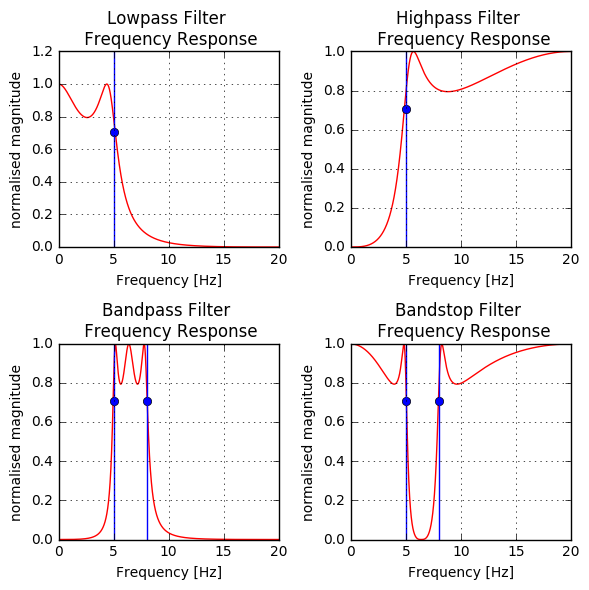

In [13]:
# requirements.
order = 3
cutoff = 5.0  # desired cutoff frequency 

#bandpass and reject
low_c = 5.0
high_c = 8.0
fs = 40 #sampling freq
max_freq = 0.5 * fs #nyquist

cutoff_n = cutoff / max_freq #normalised cutoff
#The maximum ripple allowed below unity gain in the passband. Specified in decibels, is taken as 2dB

q, p = cheby1(order,2, cutoff_n, btype='low', analog=False)
s ,r = cheby1(order,2,cutoff_n, btype ='high', analog = False)

low_c_n = low_c / max_freq
high_c_n = high_c / max_freq

v,u = cheby1(order,2,[low_c_n, high_c_n], btype ='bandpass', analog = False)
z,y = cheby1(order,2,[low_c_n, high_c_n], btype ='bandstop', analog = False)


plt.figure(figsize = (6,6))

# for low pass
w, h = freqz(q, p, worN=10000)

plt.subplot(2, 2, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'r') #plot the response
plt.plot(cutoff, 1/np.sqrt(2), 'bo') # show the cutoff point
plt.axvline(cutoff, color='b') #draw line
plt.xlim(0, fs/2)
plt.title("Lowpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('normalised magnitude')
plt.grid()

w, h = freqz(s, r, worN=10000)
plt.subplot(2, 2, 2)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'r') #plot the response
plt.plot(cutoff, 1/np.sqrt(2), 'bo') # show the cutoff point
plt.axvline(cutoff, color='b') #draw line
plt.xlim(0, fs/2)
plt.title("Highpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('normalised magnitude')
plt.grid()


w, h = freqz(v, u, worN=10000)
plt.subplot(2, 2, 3)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'r') #plot resp
plt.plot(low_c, 1/np.sqrt(2), 'bo') # show low cut point
plt.plot(high_c, 1/np.sqrt(2), 'bo') #show high cut point
plt.axvline(low_c, color='b') 
plt.axvline(high_c, color='b')
plt.xlim(0, fs/2)
plt.title("Bandpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('normalised magnitude')
plt.grid()
plt.tight_layout()

w, h = freqz(z, y, worN=10000)
plt.subplot(2, 2, 4)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'r') #plot resp
plt.plot(low_c, 1/np.sqrt(2), 'bo') # show low cut point
plt.plot(high_c, 1/np.sqrt(2), 'bo') #show high cut point
plt.axvline(low_c, color='b')
plt.axvline(high_c, color='b')
plt.xlim(0, fs/2)
plt.title("Bandstop Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('normalised magnitude')
plt.grid()
plt.tight_layout()



**1.2**

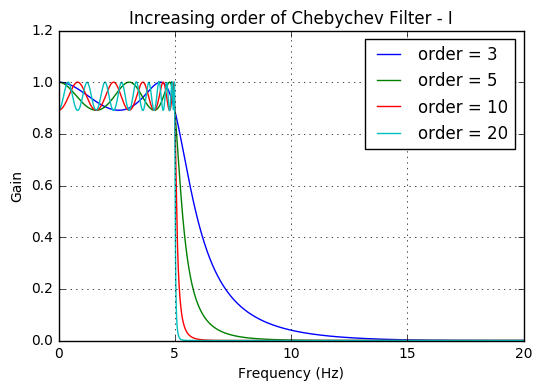

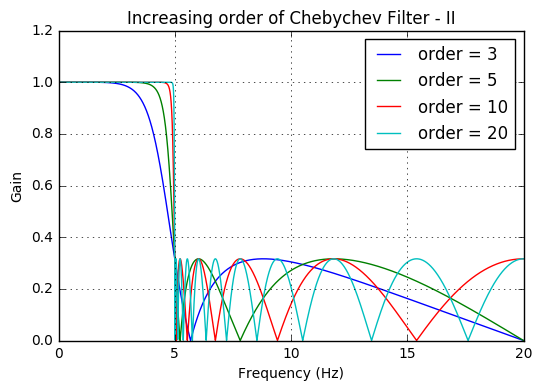

In [25]:
for order in [3, 5, 10,20]:
    q, p = cheby1(order,1, cutoff_n, btype='low', analog=False)
    w, h = freqz(q, p,worN = 10000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.title('Increasing order of Chebychev Filter - I')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.figure()
for order in [3, 5, 10, 20]:
    q, p = cheby2(order,10, cutoff_n, btype='low', analog=False)
    w, h = freqz(q, p,worN = 10000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.title('Increasing order of Chebychev Filter - II')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')


In [ ]:
As the order increases the filter tends to be more ideal but ripple also increases.
when order tends to infinity it becomes ideal. for more order its diffciult to implement.

## Recursive filter 

**2.1**

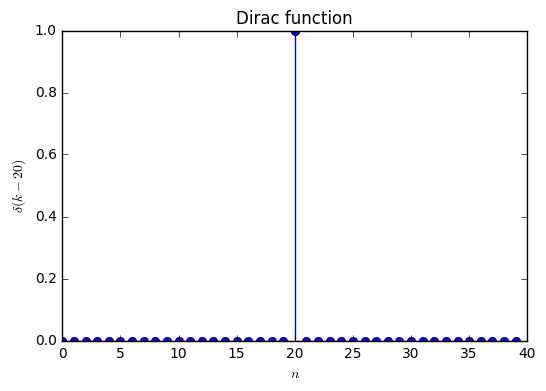

In [27]:
def dirac(n=0, N=40):
    if n> N-1:
        raise ValueError('n should be inferior to N-1')
    s = np.zeros((N,))
    s[n] = 1
    return s
dira_c = dirac(20,40)
plt.stem(dira_c)
plt.xlabel(r'$n$')
plt.ylabel(r'$\delta(k-20)$')
plt.title('Dirac function')

**2.2**

<Container object of 3 artists>

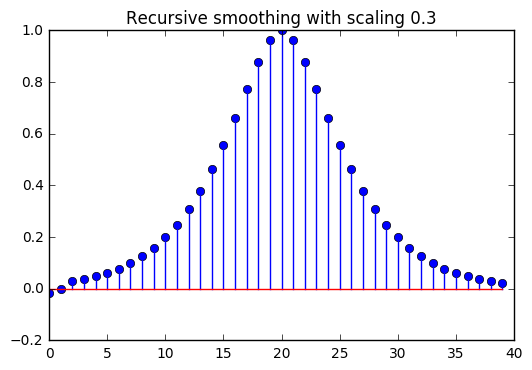

In [35]:
   
def smooth_recu(x, s=0.5, Ts=1):

    alpha = s*Ts
    a = np.exp(-alpha)

    #for causal
    y_cau = np.zeros(x.shape)
    
    for k in range(2,x.size):
        y_cau[0] = y_cau[1]= 0 
        y_cau[k] = x[k] + a*(alpha - 1)*x[k-1] + 2 * a * y_cau[k-1] - a * a * y_cau[k-2]
        
#for anticausal     
    
    y_acau = np.zeros(x.shape)
    
    for k in range(x.size-3, -1, -1):
        y_acau[0] = y_acau[1]= 0 
        y_acau[k] = a*(alpha + 1)*x[k+1] - a*a*x[k+2] + 2*a*y_acau[k+1] - a*a*y_acau[k+2]
    
    y = y_cau + y_acau #total signal
    return y

y = smooth_recu(dira_c, 0.3, Ts=1)

plt.figure()
plt.title('Recursive smoothing with scaling 0.3')
plt.stem(y)    

**2.3**

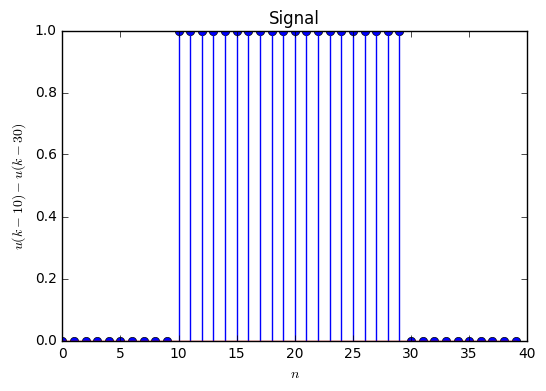

In [36]:
def unit(n=0, N=40):
    if n> N-1:
        raise ValueError('n should be inferior to N-1') 
    u = np.zeros((N,))
    u[n : N] = 1
    return u
h = unit(10)-unit(30)
plt.stem(h)
plt.xlabel(r'$n$')
plt.ylabel(r'$u(k-10) - u(k-30)$')
plt.title('Signal')


**2.4**

<Container object of 3 artists>

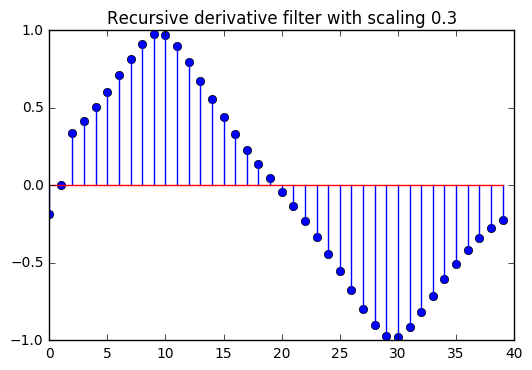

In [41]:
 
def deriv_recur(x, s=0.5, Ts=1):
    

    alpha = s*Ts
    a = np.exp(-alpha)

    #for causal
    y_cau = np.zeros(x.shape)
    
    for k in range(2,x.size):
        y_cau[0] = y_cau[1]= 0 
        y_cau[k] = -s*alpha*a*x[k-1] + 2*a*y_cau[k-1] - a**2*y_cau[k-2]
        
    
    #for anticausal
    y_acau = np.zeros(x.shape)
    
    for k in range(x.size-3, -1, -1):
        y_acau[0] = y_acau[1]= 0 
        y_acau[k] = s*alpha*a*x[k+1] + 2*a*y_acau[k+1] - a**2*y_acau[k+2]
        
    
    y = y_cau + y_acau
    return y



j = deriv_recur(h, s=0.3, Ts=1)

plt.figure()
plt.title('Recursive derivative filter with scaling 0.3')
plt.stem(j) 



**3.1**

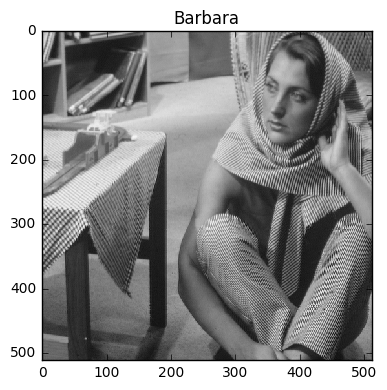

In [46]:
barbara_img = img_as_float(io.imread('./../images/barbara.gif'))
plt.figure()
plt.title("Barbara")
io.imshow(barbara_img)

**3.2** , **3.3**

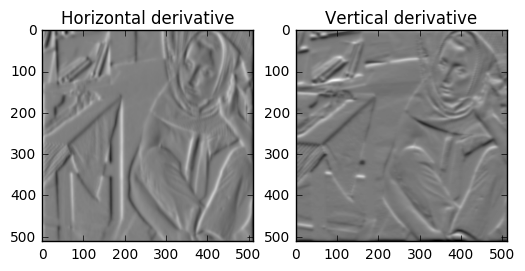

In [52]:
#smooth along colums
img_col_smooth = np.zeros(barbara_img.shape)
for j in range(barbara_img.shape[1]):
    img_col_smooth[:,j] = smooth_recu(barbara_img[:,j], s=0.5, Ts=1)

    #derivative along rows
img_row_derivative = np.zeros(barbara_img.shape)
for i in range(barbara_img.shape[0]):
    img_row_derivative[i,:] = deriv_recur(img_col_smooth[i,:], s=0.5, Ts=1)   
    
#smooth along rows
img_row_smooth = np.zeros(barbara_img.shape)
for i in range(barbara_img.shape[0]):
    img_row_smooth[i,:] = smooth_recu(barbara_img[i,:], s=0.5, Ts=1)
    
#derivative along colums
img_col_derivative = np.zeros(barbara_img.shape)    
for j in range(barbara_img.shape[1]):
    img_col_derivative[:,j] = deriv_recur(img_row_smooth[:,j], s=0.5, Ts=1)   
    
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_row_derivative,cmap = 'gray')
plt.title('Horizontal derivative')
plt.subplot(1,2,2)
plt.imshow(img_col_derivative,cmap = 'gray')
plt.title('Vertical derivative')

**3.4**